## Problem Statement
Vehicle Loan Default Prediction Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default. A financial institution has hired you to accurately predict the probability of loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date. Following Information regarding the loan and loanee are provided in the datasets:

Loanee Information (Demographic data like age, income, Identity proof etc.) Loan Information (Disbursal details, amount, EMI, loan to value ratio etc.) Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.) Doing so will ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimising the default rates.

The dataset can be found from https://www.kaggle.com/sneharshinde/ltfs-av-data?select=train.csv

## Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

random_state=42

## Data exploration

In [2]:
# Reading data from csv file and examine size of data as well as few rows of data
df = pd.read_csv("LTFS_data.csv")
print(df.shape)
df.head()

(233154, 41)


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [3]:
# Let's get an idea about all the features available in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

Here we can see that there are 41 features. Now let's see the statistics of above data:

In [4]:
# Inspect the mean and standard deviation to see the scale of each features
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [5]:
# Now check if there is null value in the data!
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

As we can see that, **Employment.Type** has missing values which we will deal with later.

###### Seperating numerical and categorical features

In [6]:
# List of columns with numerical features
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['UniqueID',
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'loan_default']

In [7]:
# List of columns with categorical features
categorical_feature_columns = list(set(df.columns) - set(numerical_feature_columns))
categorical_feature_columns

['AVERAGE.ACCT.AGE',
 'Employment.Type',
 'DisbursalDate',
 'PERFORM_CNS.SCORE.DESCRIPTION',
 'CREDIT.HISTORY.LENGTH',
 'Date.of.Birth']

Let's plot the histogram of below features to see its distribution

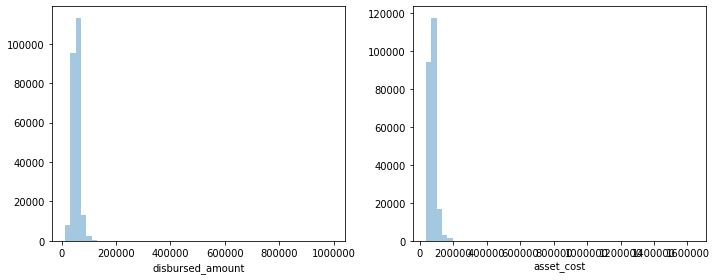

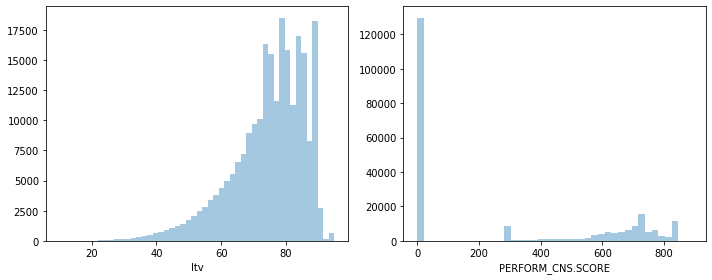

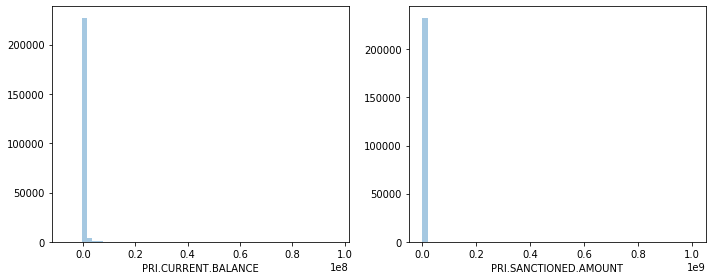

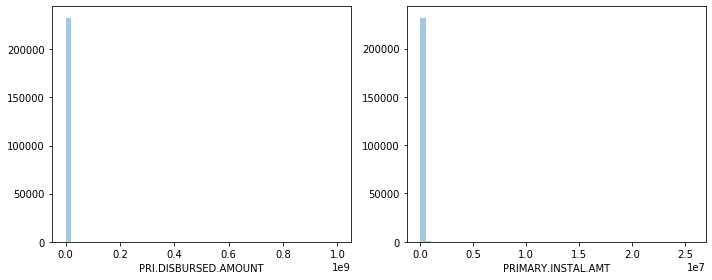

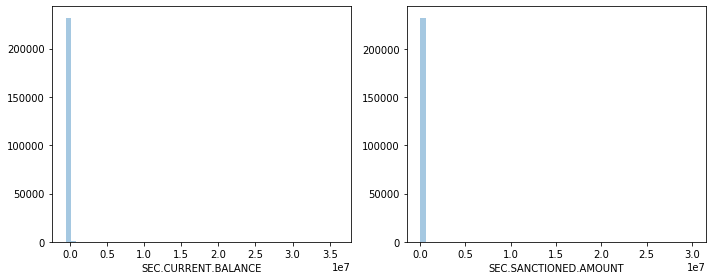

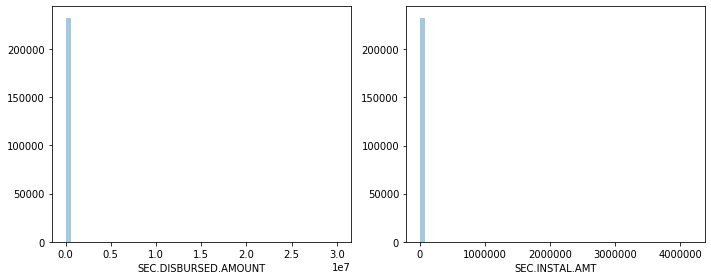

In [8]:
num_columns = ['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT',
            'PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT',
            'SEC.INSTAL.AMT']

for i in range(0, len(num_columns), 2):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.distplot(df[num_columns[i]], kde=False)
    plt.subplot(122)            
    sns.distplot(df[num_columns[i+1]], kde=False)
    plt.tight_layout()
    plt.show()

Check categorical data

In [9]:
df[categorical_feature_columns].head()

,AVERAGE.ACCT.AGE,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,CREDIT.HISTORY.LENGTH,Date.of.Birth
0,0yrs 0mon,Salaried,03-08-18,No Bureau History Available,0yrs 0mon,01-01-84
1,1yrs 11mon,Self employed,26-09-18,I-Medium Risk,1yrs 11mon,31-07-85
2,0yrs 0mon,Self employed,01-08-18,No Bureau History Available,0yrs 0mon,24-08-85
3,0yrs 8mon,Self employed,26-10-18,L-Very High Risk,1yrs 3mon,30-12-93
4,0yrs 0mon,Self employed,26-09-18,No Bureau History Available,0yrs 0mon,09-12-77


Two features **AVERAGE.ACCT.AGE** and **CREDIT.HISTORY.LENGTH** need to convert in terms of years.

In [10]:
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].str.replace('yrs ','.',regex=False)
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].str.replace('mon','',regex=False).astype(float)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].str.replace('yrs ','.',regex=False)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].str.replace('mon','',regex=False).astype(float)
df[categorical_feature_columns].head()

,AVERAGE.ACCT.AGE,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,CREDIT.HISTORY.LENGTH,Date.of.Birth
0,0.00,Salaried,03-08-18,No Bureau History Available,0.00,01-01-84
1,1.11,Self employed,26-09-18,I-Medium Risk,1.11,31-07-85
2,0.00,Self employed,01-08-18,No Bureau History Available,0.00,24-08-85
3,0.80,Self employed,26-10-18,L-Very High Risk,1.30,30-12-93
4,0.00,Self employed,26-09-18,No Bureau History Available,0.00,09-12-77


Now let's examine the **Employment.Type** feature which has missing values.

In [11]:
df['Employment.Type'].isnull().sum()

7661

In [12]:
# Calculate missing percent value from whole dataset
total_null = df.isnull().sum()
percent_null = (total_null/(df.isnull().count())) * 100
missing_data = pd.concat([total_null,percent_null], keys=['Total','Percent'],axis=1)
print(missing_data)

                                     Total   Percent
UniqueID                                 0  0.000000
disbursed_amount                         0  0.000000
asset_cost                               0  0.000000
ltv                                      0  0.000000
branch_id                                0  0.000000
supplier_id                              0  0.000000
manufacturer_id                          0  0.000000
Current_pincode_ID                       0  0.000000
Date.of.Birth                            0  0.000000
Employment.Type                       7661  3.285811
DisbursalDate                            0  0.000000
State_ID                                 0  0.000000
Employee_code_ID                         0  0.000000
MobileNo_Avl_Flag                        0  0.000000
Aadhar_flag                              0  0.000000
PAN_flag                                 0  0.000000
VoterID_flag                             0  0.000000
Driving_flag                             0  0.

Missing values contains only **3.285%** of the data, hence we can drop it.

In [13]:
df.dropna(inplace=True)
total_null_1 = df.isnull().sum()
percent_null_1 = (total_null_1/(df.isnull().count())) * 100
missing_data_1 = pd.concat([total_null_1,percent_null_1], keys=['Total','Percent'],axis=1)
print(missing_data_1)

                                     Total  Percent
UniqueID                                 0      0.0
disbursed_amount                         0      0.0
asset_cost                               0      0.0
ltv                                      0      0.0
branch_id                                0      0.0
supplier_id                              0      0.0
manufacturer_id                          0      0.0
Current_pincode_ID                       0      0.0
Date.of.Birth                            0      0.0
Employment.Type                          0      0.0
DisbursalDate                            0      0.0
State_ID                                 0      0.0
Employee_code_ID                         0      0.0
MobileNo_Avl_Flag                        0      0.0
Aadhar_flag                              0      0.0
PAN_flag                                 0      0.0
VoterID_flag                             0      0.0
Driving_flag                             0      0.0
Passport_fla

In [14]:
# Count the each category values from feature
df['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [15]:
# Encode the values in terms of 0 and 1
df['Employment.Type'].replace({'Salaried': 0, 'Self employed': 1}, inplace=True)

In [16]:
# Dropping unecessary features
df.drop(['Date.of.Birth','DisbursalDate','PERFORM_CNS.SCORE.DESCRIPTION'], axis = 1, inplace=True)

In [17]:
# Now let's check if null values present in data
df.isnull().sum().sum()

0

In [18]:
# Size of the data
df.shape

(225493, 38)

In [19]:
# Identify unique values in each features
df.nunique()

UniqueID                               225493
disbursed_amount                        24228
asset_cost                              45415
ltv                                      6541
branch_id                                  82
supplier_id                              2945
manufacturer_id                            11
Current_pincode_ID                       6659
Employment.Type                             2
State_ID                                   22
Employee_code_ID                         3269
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PRI.NO.OF.ACCTS                           107
PRI.ACTIVE.ACCTS                           40
PRI.OVERDUE.ACCTS                          22
PRI.CURRENT.BALANCE               

Calculate correlation matrix to inspect correlation among features:

In [20]:
corr_max = df.corr()  #create correlation matrix
threshold = 0.5
corr_var_list = []
cols = df.columns.tolist()

for i in range(1, len(cols)):
    for j in range(i):
        if((abs(corr_max.iloc[i,j]) > threshold) & (abs(corr_max.iloc[i,j]) < 1)):
            corr_var_list.append([corr_max.iloc[i,j], i, j])

# Sort the list showing higher ones first 
sort_corr_list = sorted(corr_var_list, key=lambda x:abs(x[0]))

#Print correlations and column names
for corr_value, i, j in sort_corr_list:
    print (f"{cols[i]} and {cols[j]} = {round(corr_value, 2)}")

SEC.OVERDUE.ACCTS and SEC.NO.OF.ACCTS = 0.51
SEC.OVERDUE.ACCTS and SEC.ACTIVE.ACCTS = 0.53
NEW.ACCTS.IN.LAST.SIX.MONTHS and PRI.NO.OF.ACCTS = 0.54
NEW.ACCTS.IN.LAST.SIX.MONTHS and PRI.ACTIVE.ACCTS = 0.7
asset_cost and disbursed_amount = 0.75
PRI.ACTIVE.ACCTS and PRI.NO.OF.ACCTS = 0.75
CREDIT.HISTORY.LENGTH and AVERAGE.ACCT.AGE = 0.82
SEC.ACTIVE.ACCTS and SEC.NO.OF.ACCTS = 0.83
VoterID_flag and Aadhar_flag = -0.87
SEC.SANCTIONED.AMOUNT and SEC.CURRENT.BALANCE = 0.93
SEC.DISBURSED.AMOUNT and SEC.CURRENT.BALANCE = 0.93
PRI.DISBURSED.AMOUNT and PRI.SANCTIONED.AMOUNT = 1.0
SEC.DISBURSED.AMOUNT and SEC.SANCTIONED.AMOUNT = 1.0


Plotting distribution of classes of target variable:

Distribution of the loan_default in the dataset
0    0.782845
1    0.217155
Name: loan_default, dtype: float64


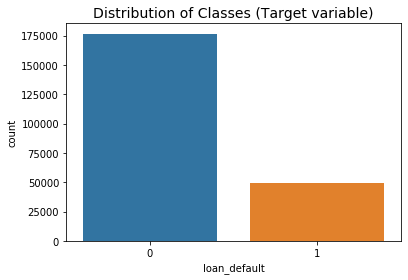

In [21]:
print('Distribution of the loan_default in the dataset')
print(df['loan_default'].value_counts()/len(df))

sns.countplot('loan_default', data=df)
plt.title('Distribution of Classes (Target variable)', fontsize=14)
plt.show()

Here we clearly see the imbalance between two classes. We need to resolve class imbalance by oversampling class 1.

In [22]:
# Over sampling to resolve imbalance
df = df.sample(frac=1)
loan_default_1 = df.loc[df['loan_default'] == 1]
loan_default_0 = df.loc[df['loan_default'] == 0]

normal_distributed_df = pd.concat([loan_default_1, loan_default_1, loan_default_1, loan_default_0])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
193304,624459,46975,66660,72.50,72,17896,45,481,1,11,...,0,0,0,0,0,0,0.0,0.0,0,0
78412,553739,61042,72700,89.41,19,16982,86,1867,0,4,...,0,0,3900,0,0,0,0.8,0.9,0,0
192904,554214,55659,81000,70.37,36,23978,86,6701,1,13,...,0,0,0,0,0,0,0.0,0.0,0,1
180397,554446,47145,69111,69.45,36,21788,86,6674,1,13,...,0,0,0,0,0,0,0.0,0.0,0,1
128343,434633,49078,68097,74.89,34,18472,51,996,1,6,...,0,0,35261,0,5,0,0.9,2.1,3,0


Distribution of the loan_default in the dataset
0    0.545799
1    0.454201
Name: loan_default, dtype: float64


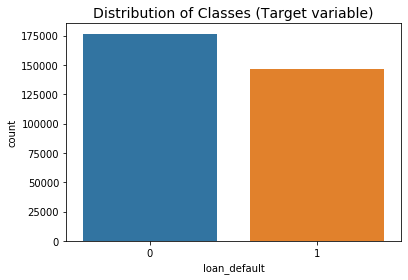

In [23]:
print('Distribution of the loan_default in the dataset')
print(new_df['loan_default'].value_counts()/len(new_df))

sns.countplot('loan_default', data=new_df)
plt.title('Distribution of Classes (Target variable)', fontsize=14)
plt.show()

In [24]:
# Size of dataset after over sampling
new_df.shape

(323427, 38)

Seperate features and target variable

In [25]:
X = new_df.drop('loan_default', axis=1)
y = new_df['loan_default'].copy()

Split train and test data with 70:30 ratio

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)

In [27]:
print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)

X_train size:  (226398, 37)
X_test size:  (97029, 37)


## Build and evaluate models

Define evaluation function which calculates following metrics:
- Confusion matrix
- Accuracy score
- Precision
- Recall
- F1 score
- ROC AUC score.

In [28]:
def evaluate_model(y_test, y_pred):
    print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
    print("Precision: ",metrics.precision_score(y_test, y_pred))
    print("Recall: ",metrics.recall_score(y_test, y_pred))
    print("f1 score: ",metrics.f1_score(y_test, y_pred))
    print("roc_auc_score: ",metrics.roc_auc_score(y_test, y_pred))

#### Scaling data before model training and testing

In [29]:
# Scaling training and testing data
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 1. Logistic Regression

In [30]:
# Find best parameters using grid search
params = {'C':[0.1, 0.5, 1, 5]}

lr = LogisticRegression()
grid = GridSearchCV(estimator=lr, param_grid=params)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix: 
 [[38210 14797]
 [24227 19795]]
Accuracy:  0.5978109637324923
Precision:  0.5722421369102683
Recall:  0.44966153286992866
f1 score:  0.5035998677080418
roc_auc_score:  0.5852548613658225


### 2. Decision Trees

In [31]:
params = {'criterion':['gini','entropy'], 'max_depth': [2,3,4,5]}
dt = DecisionTreeClassifier()
dt_clf = GridSearchCV(dt, params)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix: 
 [[35655 17352]
 [22159 21863]]
Accuracy:  0.5927918457368415
Precision:  0.5575162565344893
Recall:  0.4966380446140566
f1 score:  0.5253192690750508
roc_auc_score:  0.5846425267498377


### 3. Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=250, random_state=random_state)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
evaluate_model(y_test, y_pred)

## Conclusion

In this classification problem, it is clear the Random Forest Classifier outperformes Logistic Regression and Decision Trees models.